In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

C:\Users\gold\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [8]:
# 1 color channel, 6 filters (output channels), 3*3 kernel,  stride =1 
conv1 = nn.Conv2d(1, 6, 3, 1) # -->6 filters--> pooling -->conv2

# 6 input filters conv1, 16 filters, 3*3, stride = 1
conv2 = nn.Conv2d(6, 16, 3, 1)

In [9]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [10]:
X_train.shape  # --> 4D (batch of 1 image)

torch.Size([1, 28, 28])

In [11]:
x = X_train.view(1,1,28,28)

In [12]:
x = F.relu(conv1(x))

In [13]:
x.shape

torch.Size([1, 6, 26, 26])

In [14]:
x = F.max_pool2d(x, 2, 2)

In [15]:
x.shape

torch.Size([1, 6, 13, 13])

In [16]:
x = F.relu(conv2(x))

In [17]:
x.shape

torch.Size([1, 16, 11, 11])

In [18]:
x = F.max_pool2d(x, 2, 2)

In [19]:
x.shape  

# step by step how size processed
# 1. 28-2 = 26  --> x = F.relu(conv1(x))
# 2. 26/2 = 13  --> x = F.max_pool2d(x, 2, 2)
# 3. 13- 2 = 11 --> x = F.relu(conv2(x))
# 4. 11/2 = 5.5 --> x = F.max_pool2d(x, 2, 2)

torch.Size([1, 16, 5, 5])

In [20]:
x.view(-1, 16*5*5)

tensor([[0.1384, 0.1271, 0.1218, 0.1055, 0.1413, 0.1380, 0.1064, 0.0363, 0.1735,
         0.2244, 0.1374, 0.1274, 0.1497, 0.1790, 0.1767, 0.1379, 0.1374, 0.1081,
         0.1123, 0.1427, 0.1366, 0.1024, 0.0550, 0.2194, 0.1920, 0.0627, 0.0834,
         0.1120, 0.0858, 0.1037, 0.0605, 0.0152, 0.0000, 0.0310, 0.0762, 0.0576,
         0.0453, 0.0322, 0.1362, 0.1063, 0.0576, 0.0749, 0.0943, 0.0059, 0.0982,
         0.0801, 0.1121, 0.0392, 0.0737, 0.0625, 0.1809, 0.1818, 0.1845, 0.1779,
         0.2634, 0.2229, 0.2769, 0.1648, 0.2454, 0.3131, 0.2110, 0.2231, 0.2505,
         0.1855, 0.2012, 0.1805, 0.2120, 0.2450, 0.1848, 0.2528, 0.1792, 0.1710,
         0.2220, 0.2297, 0.2261, 0.1898, 0.1850, 0.1875, 0.1776, 0.1775, 0.1879,
         0.1314, 0.1316, 0.1591, 0.2249, 0.1881, 0.1863, 0.1606, 0.2674, 0.2212,
         0.1881, 0.1881, 0.1357, 0.1619, 0.2182, 0.1975, 0.1818, 0.1266, 0.2037,
         0.1867, 0.1134, 0.0923, 0.0950, 0.1878, 0.2111, 0.1570, 0.3012, 0.3012,
         0.2648, 0.2583, 0.1

In [21]:
x.view(-1, 16*5*5).shape

torch.Size([1, 400])

In [22]:
class CNN(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [24]:
torch.manual_seed(42)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [26]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [27]:
count_parameters(model)

    54
     6
   864
    16
 48000
   120
 10080
    84
   840
    10
______
 60074


In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [47]:
import time
start = time.time()

# Variables (trackers)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for loop epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    #train  # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        
        # Apply the model
        y_pred = model(X_train)    # we don't flatten X-train here  2D but not needed to flatten
        loss = criterion(y_pred, y_train)
        
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_pred).sum()  # true 1, false 0 sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
    
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
    
    # test  # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            
            # Apply the model
            y_val= model(X_test)
            
            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    
current = time.time()
total = current - start
print(f"Traning took {total/60} minutes")

epoch:  0  batch:  600 [  6000/60000]  loss: 0.00274154  accuracy:   2.900%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.00037255  accuracy:   3.067%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.00567633  accuracy:   3.394%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.00189139  accuracy:   3.350%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00013563  accuracy:   3.140%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00000058  accuracy:   3.278%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.00470297  accuracy:   3.352%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.00164590  accuracy:   3.285%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00029647  accuracy:   3.289%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.00003987  accuracy:   3.290%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.00008058  accuracy:   4.033%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.00000162  accuracy:   4.350%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.00149409  accuracy:   4.244%
epoch:  1  b

In [48]:
test_losses

[tensor(1.0347e-05),
 tensor(7.2718e-07),
 tensor(2.5391e-06),
 tensor(3.8147e-07),
 tensor(6.1989e-07)]

In [49]:
train_losses

[3.987209129263647e-05,
 0.0009633504087105393,
 5.364367552829208e-06,
 7.390957534880727e-07,
 0.00012285925913602114]

## Plot the loss and accuracy comparisons

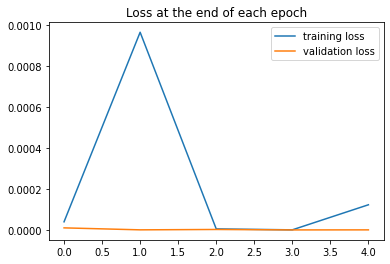

In [50]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()

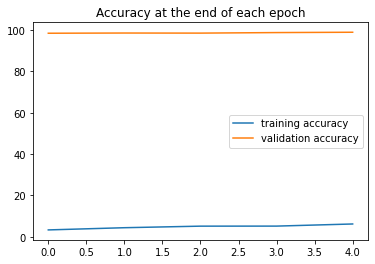

In [51]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

## Evaluate Test Data

In [52]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [53]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9897/10000 =  98.970%


In [56]:
test_data[2021][1]   #label

5

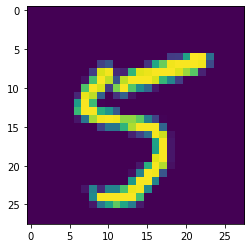

In [58]:
plt.imshow(test_data[2021][0].reshape(28,28))

In [60]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[2021][0].view(1,1,28,28))

In [61]:
new_pred

tensor([[-31.2284, -39.8536, -47.3618, -23.9512, -42.3345,   0.0000, -32.1477,
         -43.7708, -33.2068, -28.7240]])

In [62]:
new_pred.argmax()

tensor(5)

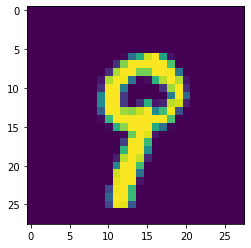

In [64]:
plt.imshow(test_data[1992][0].reshape(28,28))

In [65]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[1992][0].view(1,1,28,28))

In [66]:
new_pred.argmax()

tensor(9)

Recall that our [784,120,84,10] ANN returned an accuracy of 97.25% after 10 epochs. And it used 105,214 parameters to our current 60,074.

## Display the confusion matrix

In [67]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 976    1    4    0    0    1    3    0    2    0]
 [   0 1130    2    1    0    0    2    2    0    0]
 [   0    0 1020    0    1    0    1    2    2    0]
 [   0    1    2 1002    0    3    0    1    3    1]
 [   0    0    0    0  972    0    1    0    1    2]
 [   0    2    0    3    0  885    5    0    2    7]
 [   3    1    0    0    3    1  945    0    0    0]
 [   1    0    3    1    0    1    0 1016    2    2]
 [   0    0    1    2    0    1    1    1  957    3]
 [   0    0    0    1    6    0    0    6    5  994]]


## Examine the misses
We can track the index positions of "missed" predictions, and extract the corresponding image and label. We'll do this in batches to save screen space.

In [68]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

103

In [69]:
# Display the first 10 index positions
misses[:10]

array([  18,   62,  247,  320,  445,  582,  659,  938,  947, 1014],
      dtype=int64)

In [70]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [4536 4699 4723 4740 4838 4860 4911 4956 5642 5937 5955]
Label: [   6    6    2    3    6    4    4    8    1    5    3]
Guess: [   5    1    3    5    5    9    9    4    5    3    8]


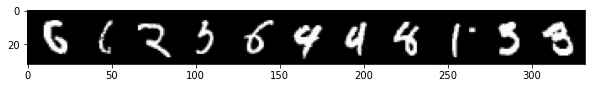

In [77]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Run a new image through the model
We can also pass a single image through the model to obtain a prediction.
Pick a number from 0 to 9999, assign it to "x", and we'll use that value to select a number from the MNIST test set.

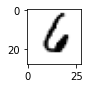

In [80]:
x = 1990
plt.figure(figsize=(1,1))
plt.imshow(test_data[x][0].reshape((28,28)), cmap="gist_yarg");

In [81]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,1,28,28)).argmax()
print("Predicted value:",new_pred.item())

Predicted value: 6
